<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [4]:
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock,Region,Income Level,Discount Availed,Customer Tenure (Years),Campaign,Return Rate (%),Website Visit Frequency,Average Cart Value
0,1,23,F,150,1,Satisfied with the service,Clothing,4,East,Medium,46,4,Winter Sale,2.981829,3,378.00
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86,West,Low,61,12,Summer Sale,1.833412,6,315.52
2,3,45,F,800,0,Regular customer,Books,24,North,Medium,50,12,Black Friday,6.547401,0,250.69
3,4,52,M,200,0,Occasional buyer,Beauty,10,East,Medium,54,7,Winter Sale,3.923717,1,222.58
4,5,29,F,300,1,High spender,Books,47,East,Medium,63,12,Winter Sale,2.306644,4,298.68
5,6,41,M,450,0,Average experience,Books,86,West,Medium,2,13,NaN,3.238817,3,158.28
6,7,38,F,670,1,Prefers online shopping,Home Goods,69,North,Low,50,8,Winter Sale,2.738895,1,290.23
7,8,27,M,120,1,New customer,Home Goods,0,North,Low,6,3,Winter Sale,5.268858,7,181.40
8,9,50,F,500,0,Loyal to the brand,Electronics,86,East,Medium,20,14,Winter Sale,6.164246,3,296.54
9,10,33,M,750,1,High conversion rate,Clothing,45,South,Medium,72,1,NaN,6.775497,4,237.93


In [5]:
top_categories = df.groupby('Purchased Category')['Total Spent'].mean().nlargest(5)
print(top_categories)

Purchased Category
Clothing       533.333333
Books          470.000000
Electronics    420.000000
Home Goods     418.000000
Beauty         400.000000
Name: Total Spent, dtype: float64


In [7]:
df['High Spender'] = df['Total Spent'] > df['Total Spent'].median()
print(df[['Customer ID', 'Total Spent', 'High Spender']])

    Customer ID  Total Spent  High Spender
0             1          150         False
1             2          600          True
2             3          800          True
3             4          200         False
4             5          300         False
5             6          450          True
6             7          670          True
7             8          120         False
8             9          500          True
9            10          750          True
10           11          610          True
11           12          290         False
12           13          400         False
13           14          320         False
14           15          510          True
15           16          350         False
16           17          550          True
17           18          700          True
18           19          250         False
19           20          400         False


In [8]:
conversion_rate = df.groupby('Income Level')['Converted'].mean()
print(conversion_rate)

Income Level
High      0.750000
Low       0.833333
Medium    0.400000
Name: Converted, dtype: float64


In [9]:
high_discount_conversions = df[(df['Discount Availed'] > 50) & (df['Converted'] == 1)]
print(high_discount_conversions)

    Customer ID  Age Gender  Total Spent  Converted  \
1             2   35      M          600          1   
4             5   29      F          300          1   
9            10   33      M          750          1   
14           15   36      F          510          1   
17           18   35      M          700          1   

                           Comments Purchased Category  Stock Region  \
1     Needs improvement in delivery             Beauty     86   West   
4                      High spender              Books     47   East   
9              High conversion rate           Clothing     45  South   
14                 Enjoys discounts        Electronics     55   West   
17  Satisfied with customer service           Clothing     87   West   

   Income Level  Discount Availed  Customer Tenure (Years)     Campaign  \
1           Low                61                       12  Summer Sale   
4        Medium                63                       12  Winter Sale   
9        Me

In [10]:
correlation_matrix = df[['Age', 'Total Spent', 'Average Cart Value']].corr()
print(correlation_matrix)

                         Age  Total Spent  Average Cart Value
Age                 1.000000     0.244955           -0.139471
Total Spent         0.244955     1.000000            0.256117
Average Cart Value -0.139471     0.256117            1.000000


In [11]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Campaign'], df['Converted'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

Chi-Square Statistic: 6.741071428571429, p-value: 0.03437121925732369


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Scaled_Total_Spent', 'Scaled_Age']] = scaler.fit_transform(df[['Total Spent', 'Age']])
print(df[['Scaled_Total_Spent', 'Scaled_Age']].head())

   Scaled_Total_Spent  Scaled_Age
0           -1.509850   -1.525854
1            0.785530   -0.184444
2            1.805699    0.933398
3           -1.254808    1.715887
4           -0.744724   -0.855149


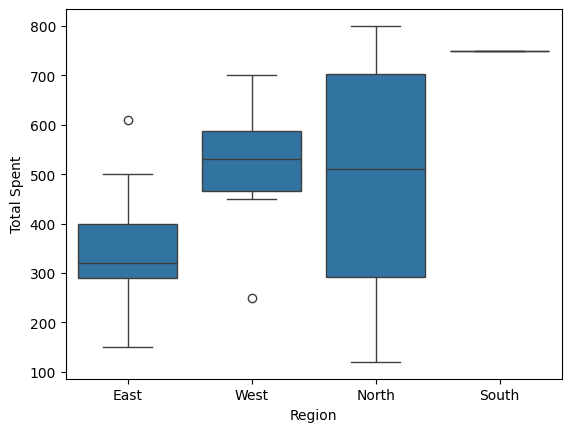

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df, x='Region', y='Total Spent')
plt.show()

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])
print(df['Cluster'].value_counts())

Cluster
1    9
0    7
2    4
Name: count, dtype: int64


In [17]:
from collections import Counter
feedback_words = " ".join(df['Comments'].fillna("")).split()
word_counts = Counter(feedback_words)
print(word_counts.most_common(10))

[('with', 4), ('the', 4), ('Satisfied', 3), ('customer', 3), ('service', 2), ('Needs', 2), ('High', 2), ('product', 2), ('Enjoys', 2), ('improvement', 1)]
